# Fighters Analysis

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
sns.set_style("dark")

Who are the current belt holders ?

In [23]:
fighters_df = pd.read_csv('data/Fighters.csv')
fighters_df.head()

,Full Name,Nickname,Ht.,Wt.,Reach,Stance,W,L,D,Belt
0,Tom Aaron,No Nickname,NaN,155.0,NaN,Orthodox,5,3,0,False
1,Danny Abbadi,The Assassin,5.11,155.0,NaN,Orthodox,4,6,0,False
2,Nariman Abbasov,Bayraktar,5.80,155.0,66.0,Orthodox,28,4,0,False
3,Darion Abbey,No Nickname,6.20,265.0,80.0,Orthodox,9,5,0,False
4,David Abbott,Tank,6.00,265.0,NaN,Switch,10,15,0,False


In [24]:
champs = fighters_df[fighters_df['Belt']]

In [25]:
print("The current UFC champions are :")
for champ in champs['Full Name'].tolist() :
    print(f'- {champ}')

The current UFC champions are :
- Magomed Ankalaev
- Tom Aspinall
- Khamzat Chimaev
- Jack Della Maddalena
- Merab Dvalishvili
- Kayla Harrison
- Alexandre Pantoja
- Valentina Shevchenko
- Ilia Topuria
- Alexander Volkanovski
- Zhang Weili


What is the most common stance between fighters ? champions ?

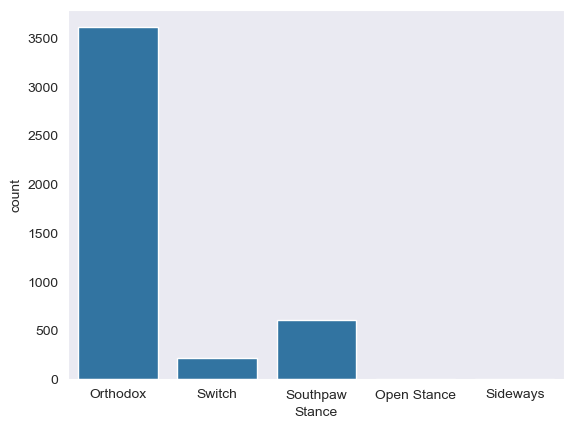

In [ ]:
sns.countplot(data=fighters_df,x='Stance')
plt.show()

Fighters are most likely to have an Orthodox Stance

Which fighter(s) has the longest Reach ever ?

In [27]:
fighters_df[fighters_df['Reach'] == fighters_df['Reach'].max()]

,Full Name,Nickname,Ht.,Wt.,Reach,Stance,W,L,D,Belt
936,Robelis Despaigne,The Big Boy,6.70,265.0,84.0,Orthodox,5,2,0,False
1887,Jon Jones,Bones,6.40,248.0,84.0,Orthodox,28,1,0,False
3036,Sergei Pavlovich,No Nickname,6.30,257.0,84.0,Southpaw,20,3,0,False
3880,Stefan Struve,Skyscraper,6.11,265.0,84.0,Orthodox,33,13,0,False


Height Vs Weight

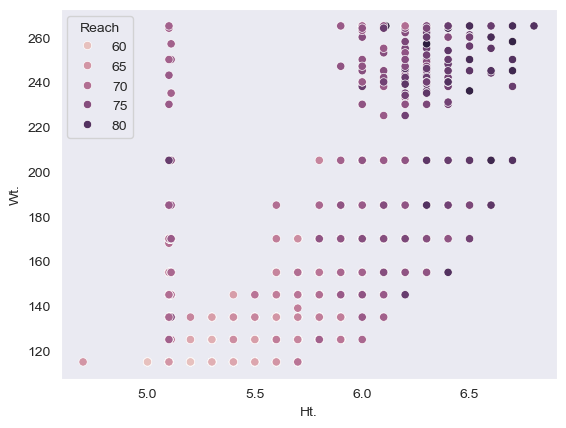

In [28]:
sns.scatterplot(data=fighters_df[~(fighters_df['Wt.']>500)],x='Ht.',y='Wt.',hue='Reach')
plt.show()

There is not a big correlation between the two variables

# Events Analysis

In [29]:
events_df = pd.read_csv('data/Events.csv',parse_dates=['Date'])
events_df.head()

,Event_Id,Name,Date,Location
0,5efaaf313b652dd7,UFC Fight Night: Lopes vs. Silva,2025-09-13,"San Antonio, Texas, USA"
1,6e380a4d73ab4f0e,UFC Fight Night: Imavov vs. Borralho,2025-09-06,"Paris, Ile-de-France, France"
2,754968e325d6f60d,UFC Fight Night: Walker vs. Zhang,2025-08-23,"Shanghai, Hebei, China"
3,421ccfc6ddb17958,UFC 319: Du Plessis vs. Chimaev,2025-08-16,"Chicago, Illinois, USA"
4,6cd3dfc54f01287f,UFC Fight Night: Dolidze vs. Hernandez,2025-08-09,"Las Vegas, Nevada, USA"


Which year had the most events ?

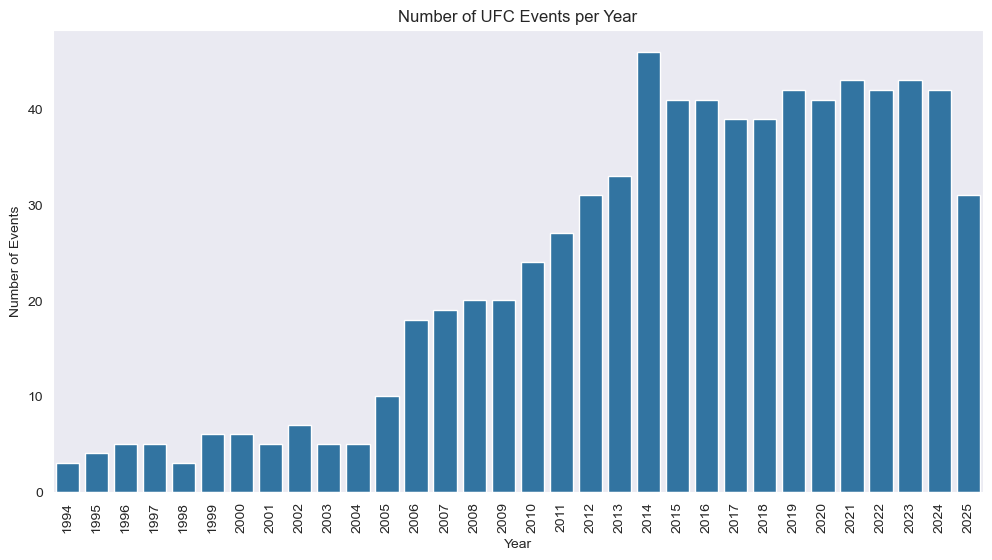

In [30]:
events_df['Year'] = events_df['Date'].dt.year

events_per_year = events_df.groupby('Year').size()

plt.figure(figsize=(12,6))
sns.barplot(x=events_per_year.index, y=events_per_year.values, color='C0')
plt.title("Number of UFC Events per Year")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Number of Events")
plt.show()

- 2014 had the most events.

Which location witnessed the most events

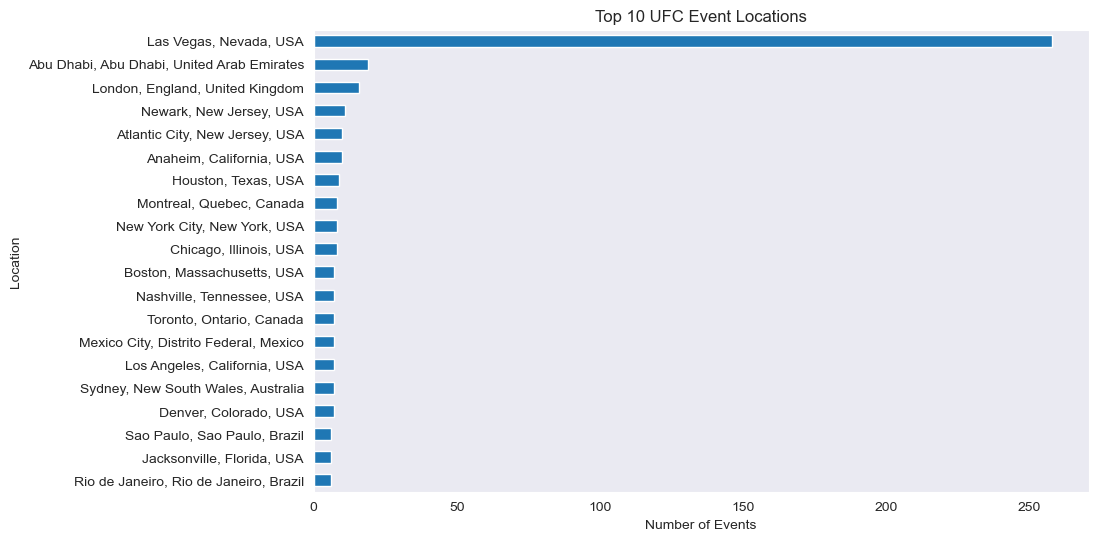

In [31]:
events_per_location = events_df['Location'].value_counts().head(20)

events_per_location.plot(kind='barh', figsize=(10,6))
plt.title("Top 10 UFC Event Locations")
plt.xlabel("Number of Events")
plt.ylabel("Location")
plt.gca().invert_yaxis()
plt.show()

Las Vegas is by far the location with most events

# Fights Analysis

In [32]:
fights_df = pd.read_csv('data/Fights.csv')
fights_df.head()

,Fighter_1,Fighter_2,KD_1,KD_2,STR_1,STR_2,TD_1,TD_2,SUB_1,SUB_2,...,Distance_%_1,Distance_%_2,Clinch_%_1,Clinch_%_2,Ground_%_1,Ground_%_2,Total Str._%_1,Total Str._%_2,Sig. Str._%_1,Sig. Str._%_2
0,Diego Lopes,Jean Silva,1,0,74,43,3,0,0,0,...,0.48,0.47,0.50,1.0,0.62,0.00,0.56,0.47,0.55,0.47
1,David Martinez,Rob Font,0,0,62,49,0,0,0,0,...,0.31,0.40,0.00,0.0,0.00,0.00,0.31,0.55,0.31,0.40
2,Rafa Garcia,Jared Gordon,1,0,91,65,2,1,2,0,...,0.51,0.35,0.91,0.0,0.79,0.00,0.60,0.40,0.56,0.35
3,Kelvin Gastelum,Dustin Stoltzfus,1,0,57,64,0,1,0,0,...,0.48,0.41,1.00,0.8,0.00,0.71,0.49,0.46,0.49,0.44
4,Alexander Hernandez,Diego Ferreira,1,0,30,23,0,0,0,0,...,0.33,0.24,0.00,0.0,0.71,0.00,0.40,0.23,0.40,0.23


Fight rounds distribution

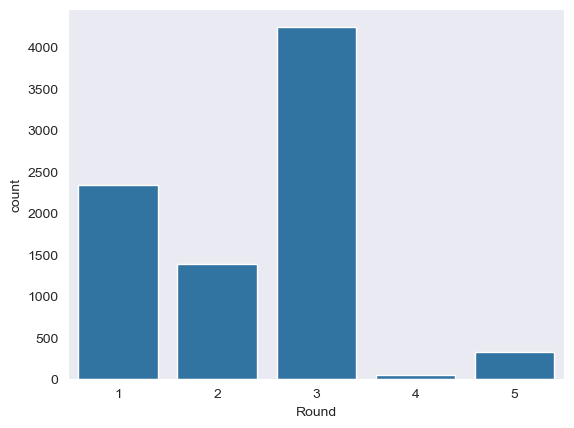

In [33]:
sns.countplot(x="Round", data=fights_df)
plt.show()

What is the most common fight ending's method?

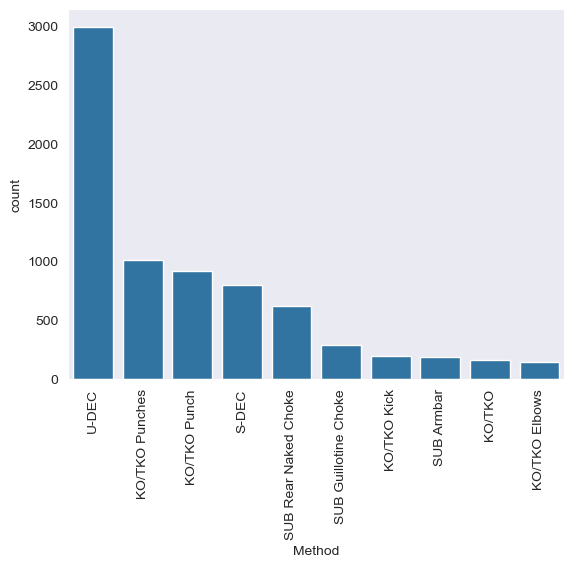

In [34]:
top_methods = fights_df['Method'].value_counts().head(10).index
sns.countplot(data=fights_df[fights_df['Method'].isin(top_methods)],
              x='Method', order=top_methods)
plt.xticks(rotation=90)
plt.show()

In [35]:
sum_of_attacks = fights_df.groupby('Weight_Class')[['KD_1','KD_2','TD_1','TD_2','SUB_1','SUB_2','STR_1','STR_2']].sum().sum(axis=1)

In [36]:
fights_per_weight_class = fights_df.groupby('Weight_Class').size()

In [37]:
(sum_of_attacks / fights_per_weight_class).sort_values(ascending=False)

Weight_Class
Women's Flyweight        106.880769
Women's Strawweight      104.577586
Women's Bantamweight      95.860870
Catch Weight              93.863014
Women's Featherweight     90.666667
Featherweight             88.003663
Bantamweight              86.762483
Flyweight                 82.195373
Lightweight               75.445783
Welterweight              74.656089
Middleweight              67.763110
Light Heavyweight         67.633103
Heavyweight               60.297297
Super Heavyweight         31.000000
Open Weight               15.450980
dtype: float64

- Women's Flyweight, Catch Weight and Featherweight Fights are probably the most enjoyable in terms of action and strikes 

- What is the average control time per weight division?

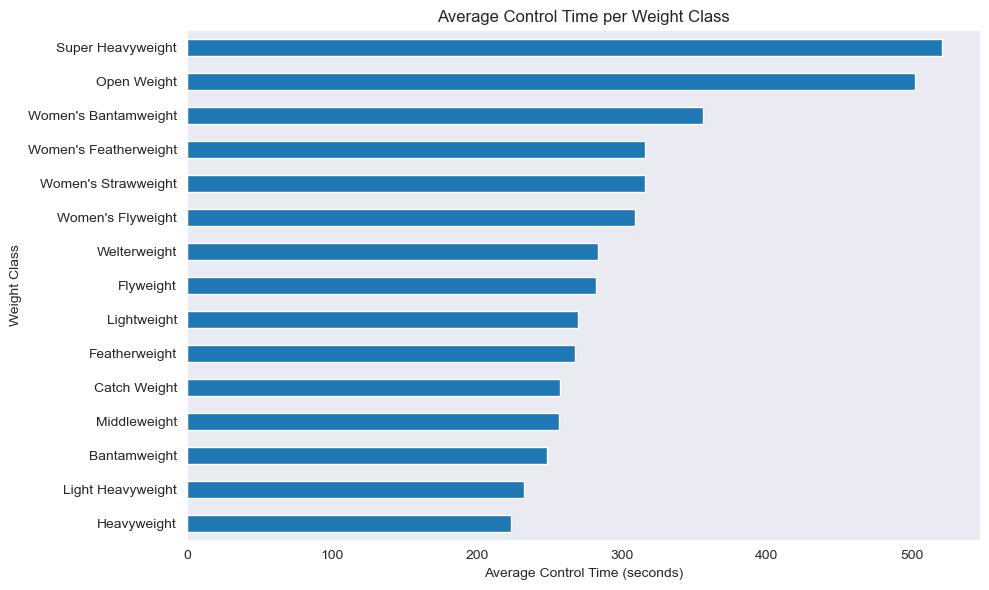

In [38]:
control_by_weight = fights_df.groupby('Weight_Class')[['Ctrl_1','Ctrl_2']].mean().sum(axis=1).sort_values(ascending=False)
control_by_weight.sort_values().plot(kind='barh', color='C0', figsize=(10, 6))
plt.title('Average Control Time per Weight Class')
plt.xlabel('Average Control Time (seconds)')
plt.ylabel('Weight Class')
plt.tight_layout()
plt.show()

HEHE ! This is almost like ranking the most boring weight divisions. Fights with higher control time are probably the ones you don't wanna watch to for entertainment.

- Which method is dominating UFC fights?

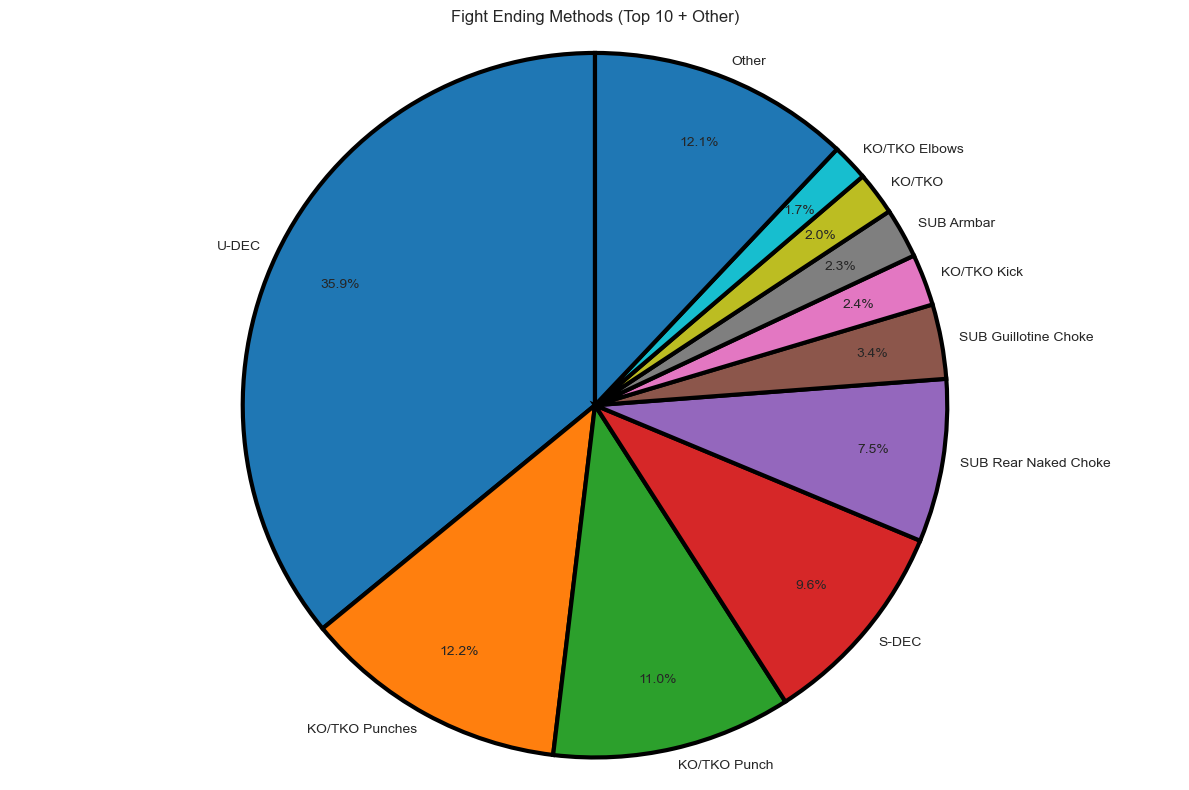

In [39]:
method_counts = fights_df['Method'].value_counts()

# Keep only top counts
top_counts = method_counts.reindex(top_methods, fill_value=0)
# Sum other count
other_count = method_counts[~method_counts.index.isin(top_methods)].sum()


labels = top_methods.tolist() + (['Other'] if other_count > 0 else [])
sizes = top_counts.values.tolist() + ([other_count] if other_count > 0 else [])

fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.8,
    labeldistance=1.05,
    wedgeprops = {'ls':'-','lw': 3,'ec':'black'}
)
ax.axis('equal')
ax.set_title('Fight Ending Methods (Top 10 + Other)')

plt.tight_layout()
plt.show()

In [40]:
print(f"Nearly {int(len(fights_df)*0.122)} of the UFC fights was ended by KO/TKO Punches")

Nearly 1016 of the UFC fights was ended by KO/TKO Punches


> For now, this is enough for **EDA**. This is an iterative process so I am gonna do much more of it when building the ML model.